In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# check gpu availability
# torch.cuda.is_available()

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
/opt/conda/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
YOLOv5 🚀 2022-10-11 Python-3.9.12 torch-1.7.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
results = model("./data/bus.jpg", size=320)

In [5]:
data = results.pandas().xyxy[0]

In [6]:
data

,xmin,ymin,xmax,ymax,confidence,class,name
0,51.484657,399.778198,225.745224,894.170044,0.896071,0,person
1,25.144255,230.526947,803.268372,767.074524,0.845303,5,bus
2,219.537170,398.213684,350.127777,861.612061,0.782393,0,person
3,671.847229,432.520142,810.000000,877.744934,0.651240,0,person


In [7]:
data["class"].apply(lambda x: results.names[x])

0    person
1       bus
2    person
3    person
Name: class, dtype: object

In [8]:
results.render()[0].shape

(1080, 810, 3)

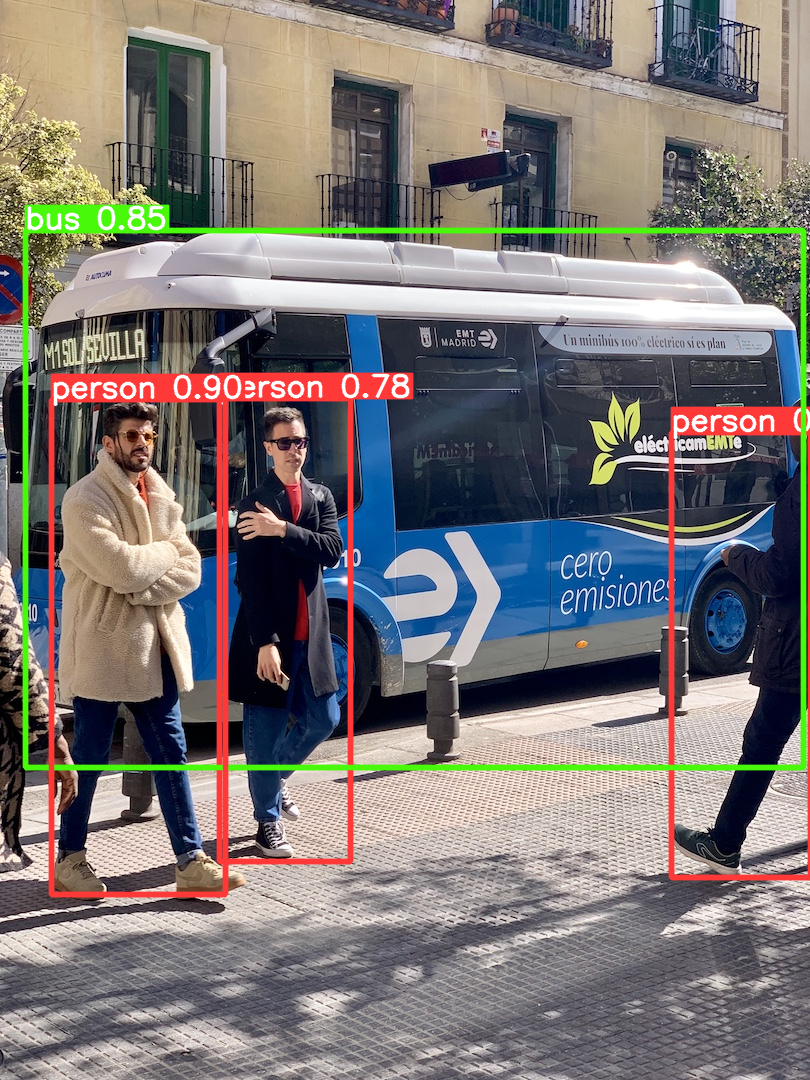

In [9]:
results.show()